# Visual Exploratory Analysis

## Does time of day affect arrest rate?

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
source_path = 'F:/Data Camp Courses/Analyzing Police Activity with Pandas/Visual Exploratory Analysis/'

In [4]:
source_file = 'ri_cleansed.csv'

In [5]:
ri = pd.read_csv(source_path + source_file, sep=',', parse_dates=['stop_datetime'], index_col='stop_datetime')

In [6]:
ri.shape

(86536, 13)

In [7]:
ri.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


## Calculating the hourly arrest rate

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the arrest rate. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops. Then, you'll calculate the hourly arrest rate by using the hour attribute of the index. The hour ranges from 0 to 23, in which:

    0 = midnight
    12 = noon
    23 = 11 PM

    Take the mean of the is_arrested column to calculate the overall arrest rate.
    Group by the hour attribute of the DataFrame index to calculate the hourly arrest rate.
    Save the hourly arrest rate Series as a new object, hourly_arrest_rate.


In [8]:
ri['is_arrested'].mean()

0.0355690117407784

In [9]:
ri.groupby(ri.index.hour)['is_arrested'].mean()

stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64

In [10]:
hourly_arrest_rate = ri.groupby(ri.index.hour)['is_arrested'].mean()

Great work! Next you'll plot the data so that you can visually examine the arrest rate trends.

## Plotting the hourly arrest rate

In this exercise, you'll create a line plot from the hourly_arrest_rate object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!


    Import matplotlib.pyplot using the alias plt.
    Create a line plot of hourly_arrest_rate using the .plot() method.
    Label the x-axis as 'Hour', label the y-axis as 'Arrest Rate', and title the plot 'Arrest Rate by Time of Day'.
    Display the plot using the .show() function.


In [11]:
hourly_arrest_rate.plot(figsize=(16,10))

In [12]:
plt.xlabel('Hour')

Text(0.5,0,'Hour')

In [13]:
plt.ylabel('Arrest Rate')

Text(0,0.5,'Arrest Rate')

In [14]:
plt.title('Arrest Rate by Time of Day')

Text(0.5,1,'Arrest Rate by Time of Day')

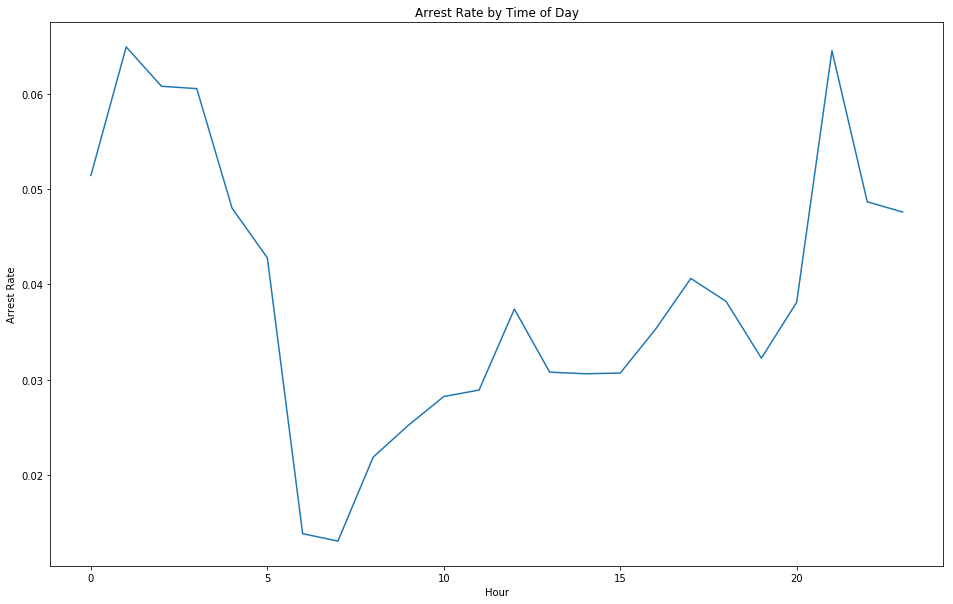

In [15]:
plt.show()

Wow! The arrest rate has a significant spike overnight, and then dips in the early morning hours.

## Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. In this exercise, you'll assess whether these drug-related stops are becoming more common over time.

The Boolean column drugs_related_stop indicates whether drugs were found during a given stop. You'll calculate the annual drug rate by resampling this column, and then you'll use a line plot to visualize how the rate has changed over time.


    Calculate the annual rate of drug-related stops by resampling the drugs_related_stop column (on the 'A' frequency) and taking the mean.
    Save the annual drug rate Series as a new object, annual_drug_rate.
    Create a line plot of annual_drug_rate using the .plot() method.
    Display the plot using the .show() function.


In [17]:
ri['drugs_related_stop'].resample('A').mean()

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

In [19]:
annual_drug_rate = ri['drugs_related_stop'].resample('A').mean()

In [24]:
annual_drug_rate.plot(figsize=(16,10))

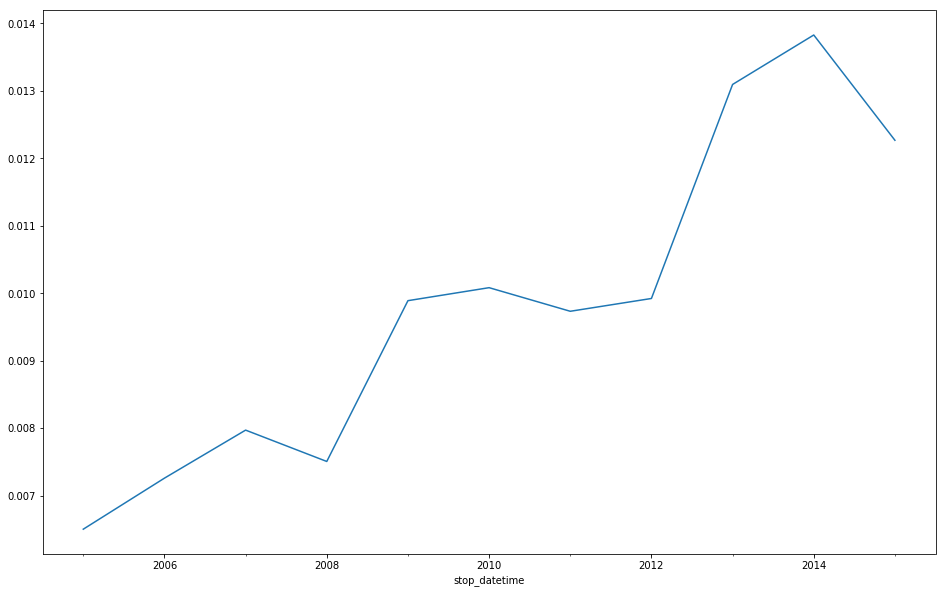

In [25]:
plt.show()

Interesting! The rate of drug-related stops nearly doubled over the course of 10 years. Why might that be the case?

## Comparing drug and search rates

As you saw in the last exercise, the rate of drug-related stops increased significantly between 2005 and 2015. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.


    Calculate the annual search rate by resampling the search_conducted column, and save the result as annual_search_rate.
    Concatenate annual_drug_rate and annual_search_rate along the columns axis, and save the result as annual.
    Create subplots of the drug and search rates from the annual DataFrame.
    Display the subplots.


In [26]:
annual_search_rate = ri['search_conducted'].resample('A').mean()

In [32]:
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

In [39]:
annual.plot(subplots=True, figsize=(12,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000274BBBA37F0>,
      dtype=object)

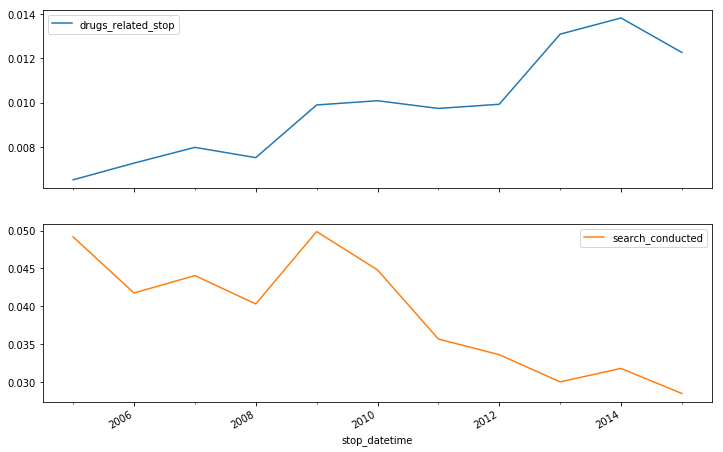

In [40]:
plt.show()

Wow! The rate of drug-related stops increased even though the search rate decreased, disproving our hypothesis.

## Tallying violations by district

The state of Rhode Island is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the "K" zones, which you'll examine further in the next exercise.


    Create a frequency table from the district and violation columns using the pd.crosstab() function.
    Save the frequency table as a new object, all_zones.
    Select rows 'Zone K1' through 'Zone K3' from all_zones using the .loc[] accessor.
    Save the smaller table as a new object, k_zones.



In [41]:
pd.crosstab(ri['district'], ri['violation'])

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


In [42]:
all_zones = pd.crosstab(ri['district'], ri['violation'])

In [43]:
all_zones.loc['Zone K1':'Zone K3']

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322


In [44]:
k_zones = all_zones.loc['Zone K1':'Zone K3']

Great job! Next you'll plot the violations so that you can compare these districts.

## Plotting violations by district

Now that you've created a frequency table focused on the "K" zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a bar plot, which is an appropriate plot type since you're comparing categorical data. Then you'll create a stacked bar plot in order to get a slightly different look at the data. Which plot do you find to be more insightful?


    Create a bar plot of k_zones.
    Display the plot and examine it. What do you notice about each of the zones?



In [50]:
k_zones.plot(kind='bar', stacked=True, figsize=(16,10))

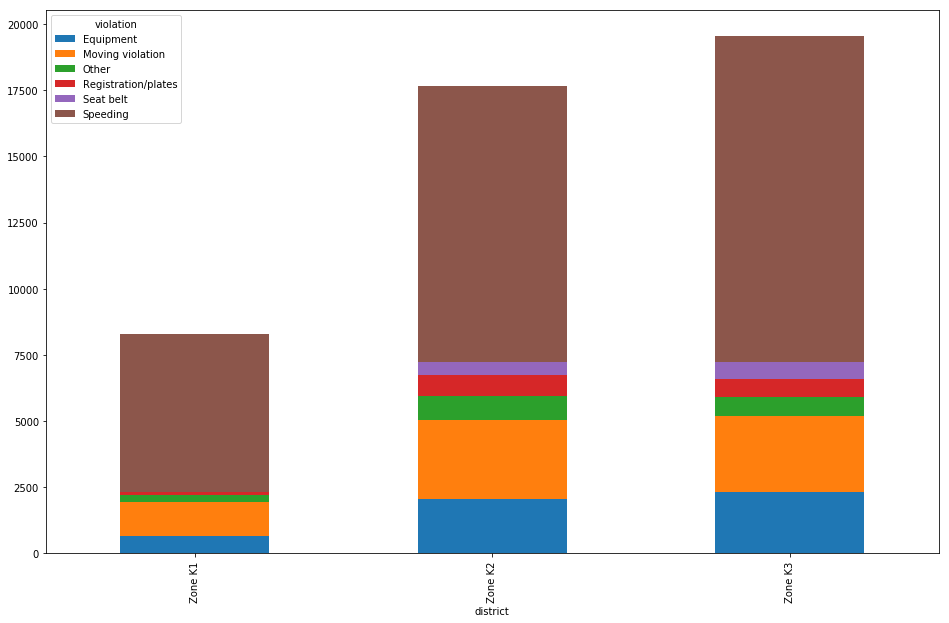

In [51]:
plt.show()

Interesting! The vast majority of traffic stops in Zone K1 are for speeding, and Zones K2 and K3 are remarkably similar to one another in terms of violations.

## Converting stop durations to numbers

In the traffic stops dataset, the stop_duration column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as strings, such as '0-15 Min'. How can you make this data easier to analyze?

In this exercise, you'll convert the stop durations to integers. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

    Convert '0-15 Min' to 8
    Convert '16-30 Min' to 23
    Convert '30+ Min' to 45

    Print the unique values in the stop_duration column. (This has been done for you.)
    Create a dictionary called mapping that maps the stop_duration strings to the integers specified above.
    Convert the stop_duration strings to integers using the mapping, and store the results in a new column called stop_minutes.
    Print the unique values in the stop_minutes column, to verify that the durations were properly converted to integers.


In [52]:
ri['stop_duration'].unique()

array(['0-15 Min', '16-30 Min', '30+ Min'], dtype=object)

In [56]:
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

In [57]:
ri['stop_minutes']= ri.stop_duration.map(mapping)

In [58]:
ri['stop_minutes'].unique()

array([ 8, 23, 45], dtype=int64)

Excellent! Next you'll analyze the stop length for each type of violation.

## Plotting stop length

If you were stopped for a particular violation, how long might you expect to be detained?

In this exercise, you'll visualize the average length of time drivers are stopped for each type of violation. Rather than using the violation column in this exercise, you'll use violation_raw since it contains more detailed descriptions of the violations.


    For each value in the violation_raw column, calculate the mean number of stop_minutes that a driver is detained.
    Save the resulting Series as a new object, stop_length.
    Sort stop_length by its values, and then visualize it using a horizontal bar plot.
    Display the plot.


In [60]:
ri.groupby('violation_raw')['stop_minutes'].mean()

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64

In [61]:
stop_length = ri.groupby('violation_raw')['stop_minutes'].mean()

In [66]:
stop_length.sort_values()

violation_raw
Seatbelt Violation                   9.662815
Speeding                            10.581562
Equipment/Inspection Violation      11.445655
Violation of City/Town Ordinance    13.254144
Registration Violation              13.736970
Other Traffic Violation             13.844490
Suspicious Person                   14.910714
Special Detail/Directed Patrol      15.123632
Motorist Assist/Courtesy            17.741463
APB                                 17.967033
Call for Service                    22.124371
Warrant                             24.055556
Name: stop_minutes, dtype: float64

In [69]:
stop_length.sort_values().plot(kind='barh')

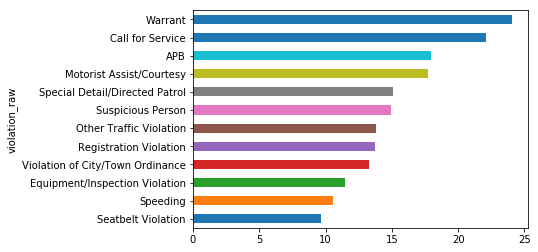

In [70]:
plt.show()

Congratulations! You've completed the chapter on visual exploratory data analysis!